<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Importing-Data" data-toc-modified-id="Importing-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Data</a></span></li><li><span><a href="#Inicial-Exploration" data-toc-modified-id="Inicial-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inicial Exploration</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Visualisations" data-toc-modified-id="Visualisations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Visualisations</a></span></li><li><span><a href="#Preprocessing-for-Sentiment-Analysis" data-toc-modified-id="Preprocessing-for-Sentiment-Analysis-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Preprocessing for Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#ML-and-DL-Based-models" data-toc-modified-id="ML-and-DL-Based-models-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>ML and DL-Based models</a></span></li><li><span><a href="#Lexicon-Based-Models" data-toc-modified-id="Lexicon-Based-Models-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Lexicon Based Models</a></span></li></ul></li></ul></li></ul></div>

## Importing Libraries

In [1]:
#Pre-prep Downloads for Jupyter notebook Functioning
!pip install emoji

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# import random
# random.seed(20)
# np.random.seed(20)

## Importing Data

In [3]:
#read in dataset in pandas format
#dataset = pd.read_csv('airlines_reviews.csv', sep=',')
dataset = pd.read_csv('/Users/antoniooliveira/Downloads/airlines_reviews.csv')
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


## Inicial Exploration

**Describe & Info**

In [4]:
dataset.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

**Unique Values**

In [6]:
dataset.nunique()

Title                     7614
Name                      6583
Review Date               2549
Airline                     10
Verified                     5
Reviews                   8099
Type of Traveller            4
Month Flown                107
Route                     5566
Class                        4
Seat Comfort                 5
Staff Service                5
Food & Beverages             5
Inflight Entertainment       6
Value For Money              5
Overall Rating              10
Recommended                  2
dtype: int64

In [7]:
list_ = ['Airline', 'Verified', 'Type of Traveller', 'Class', 'Seat Comfort',
        'Staff Service', 'Food & Beverages', 'Inflight Entertainment', 'Value For Money',
        'Overall Rating', 'Recommended']


for value in list_:
    unique_values = dataset[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")

    
## Verified has some weird values --> Unverified and NotVerified arent the same ?

Unique values in column 'Airline': 
 ['Singapore Airlines' 'Qatar Airways' 'All Nippon Airways' 'Emirates'
 'Japan Airlines' 'Turkish Airlines' 'Air France' 'Cathay Pacific Airways'
 'EVA Air' 'Korean Air'] 


Unique values in column 'Verified': 
 ['True' 'False' '*Unverified*' 'NotVerified'
 'we do appreciate you bringing this matter to our attention. Please accept my apologies for not having met your expectations; I do hope that we can leave you and your family with a more positive impression on your future flights with us'] 


Unique values in column 'Type of Traveller': 
 ['Solo Leisure' 'Family Leisure' 'Business' 'Couple Leisure'] 


Unique values in column 'Class': 
 ['Business Class' 'Economy Class' 'Premium Economy' 'First Class'] 


Unique values in column 'Seat Comfort': 
 [4 5 1 2 3] 


Unique values in column 'Staff Service': 
 [4 3 5 1 2] 


Unique values in column 'Food & Beverages': 
 [4 2 5 1 3] 


Unique values in column 'Inflight Entertainment': 
 [4 1 5 2 3 0] 


Un

## Exploratory Data Analysis

### Missing Values

In [8]:
dataset.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

### Outliers

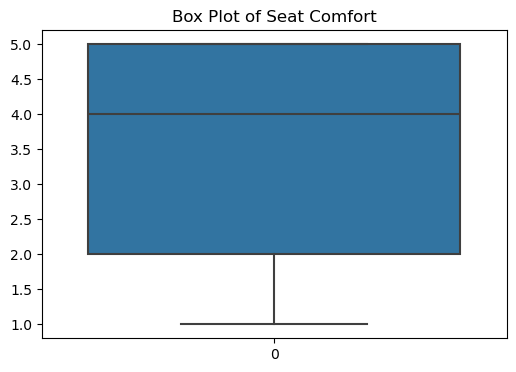

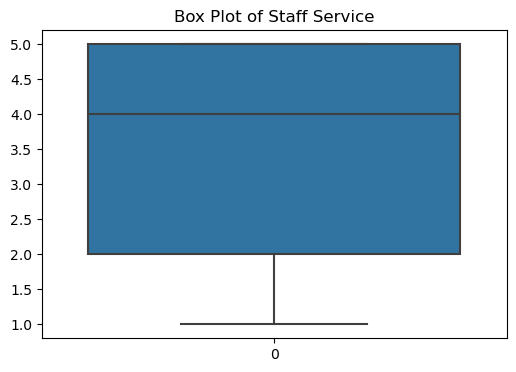

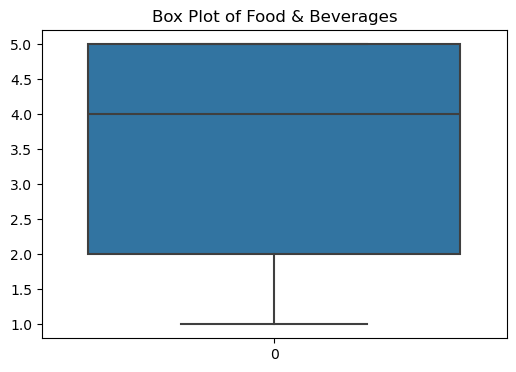

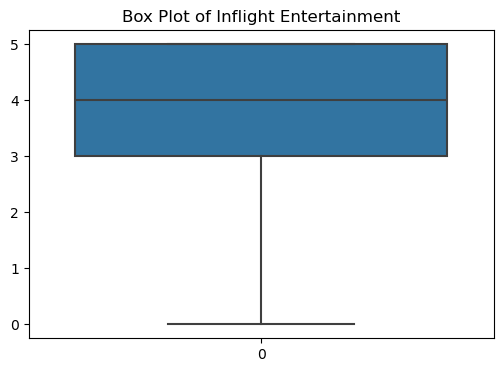

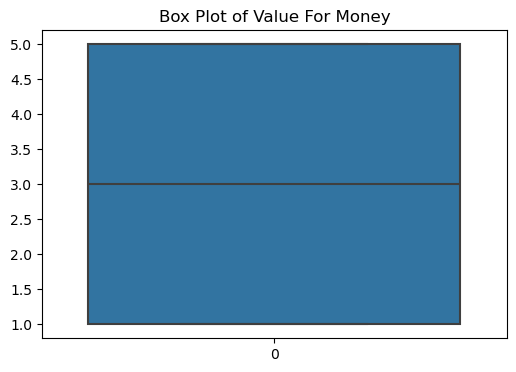

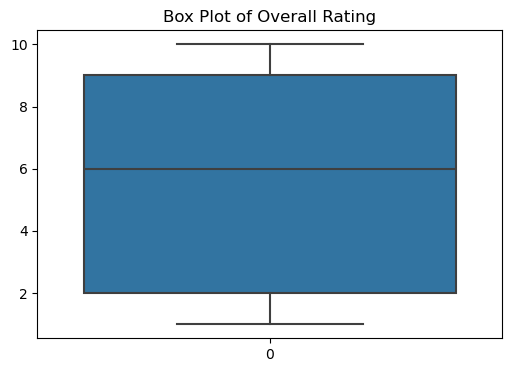

In [9]:
import seaborn as sns
# Get a list of all numeric column names
columns_to_check = dataset.select_dtypes(include=['int', 'float']).columns.to_list()

for column in columns_to_check:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(data=dataset[column])
    plt.title(f'Box Plot of {column}')
    plt.xticks()
    plt.show()


### Feature Engineering 

**Looking for Emojis**

In [13]:
import emoji

reviews_column = dataset['Reviews']

# Function to check if a string contains emojis
def contain_emoji(review):
    emoList = emoji.emoji_list(review)
    
    if emoList:
        return True
    
    return False

# Check for emojis in each review
emoji_check = [contain_emoji(review) for review in reviews_column]

# Print reviews containing emojis
for i in range(len(emoji_check)):
    if emoji_check[i] == True:
        print("This is Review: " + str(i))
        print(reviews_column[i])



This is Review: 4708
  Valerie, terminal 2A, Paris CDG airport, left our hearts feeling warm with her compassion, patience and understanding whilst checking our bags. She showed us great kindness and deserves recognition for her customer service skills performed. Thank you to Valerie, if you read this, for all the small efforts which made our travels much easier while pregnant. Thank you for going above and beyond ☺️ Turkish airlines hires great assets to their company.


Since there is only one Review it will be dropped

In [14]:
dataset.drop(4708, inplace=True)

**Converting Overall Rating to 3 classes**

In [15]:
#Create new function to convert Rating scores to 3 categories
#1-3, 4-7, 8-10 forms negative, neutral, positive [0,1,2]
def score_convert_senti(score):
    if score <= 3:
        return 0
    elif score >= 4 and score <= 7:
        return 1
    elif score >= 8:
        return 2

#Create new column, convert scoring into 3 categories
dataset["Sentiment"] = dataset["Overall Rating"].apply(score_convert_senti)

#dataset has derived sentiment column added
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,0
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2


**Converting Reviews into a list**

In [16]:
#place reviews column textual data into list
reviews = dataset["Reviews"]
reviews_list = list(reviews)

### Visualisations

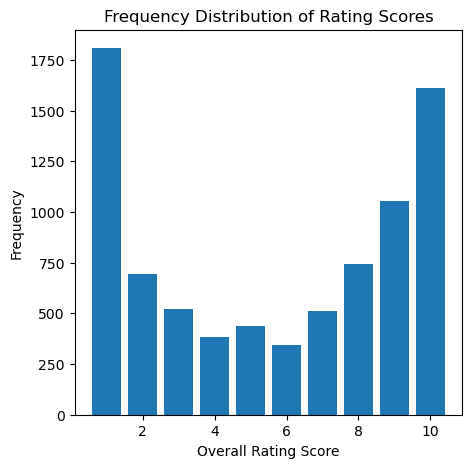

In [17]:
#Determine frequency of Overall Ratings Through Plot
freq_counts = dataset["Overall Rating"].value_counts()
rating_score = freq_counts.index

plt.figure(figsize=(5, 5))
plt.bar(rating_score, freq_counts)
plt.xlabel('Overall Rating Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Rating Scores')
plt.show()

### Preprocessing for Sentiment Analysis

In [18]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
sent_tokenizer = PunktSentenceTokenizer()
from transformers import BertTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def stopword_remover(tokenized_comment, stop_words):
    clean_text = []
    for token in tokenized_comment:
        if token not in stop_words:
            clean_text.append(token)
    return clean_text

def reviews_preprocessor(reviews,
                 remove_punctuation = False,
                 lowercase = False,
                 tokenized_output = False,
                 bert_tokenization = False,
                 remove_stopwords = True,
                 lemmatization = False,
                 stemming = False,
                 sentence_output = True):
    
    clean_text = reviews
    stop_words = set(stopwords.words('english'))
    
    
    
    # Punctuation
    if remove_punctuation:
        clean_text = re.compile(r'[^\w\s]').sub(' ', clean_text)
        
    # Lowercase    
    if lowercase:
        clean_text = clean_text.lower()
    
    #Tokenisation  
    clean_text = word_tokenize(str(clean_text))
    
    # Stopwords
    if remove_stopwords:
        clean_text = stopword_remover(clean_text, stop_words)
    
    # Lemmatisation and Stemming
    if lemmatization:
        lemmatizer = WordNetLemmatizer()
        clean_text = [lemmatizer.lemmatize(token) for token in clean_text]
        
    elif stemming:
        stemmer = PorterStemmer()
        clean_text = [stemmer.stem(token) for token in clean_text]
        
     # Removing Tokenisation    
    if tokenized_output == False:
        #re-join
        clean_text = " ".join(clean_text)
        #Remove space before punctuation
        clean_text = re.sub(r'(\s)(?!\w)','',clean_text)
        
    elif bert_tokenization:
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        clean_text = tokenizer.tokenize(clean_text) 

    if sentence_output:
        clean_text = sent_tokenize(str(clean_text))
    
    
    return clean_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Preprocessing with the function**

In [19]:
dataset['Reviews_1'] = dataset['Reviews'].apply(lambda x: 
                                 reviews_preprocessor(x,
                                 remove_punctuation=False,
                                 lowercase=False,
                                 remove_stopwords=True,
                                 lemmatization=False,
                                 stemming=False,
                                 tokenized_output=False,
                                 bert_tokenization=False,
                                 sentence_output=False))

**Testing the function**

In [20]:
# test = dataset.sample(10)
# test.head(5)

In [21]:
# test['Reviews_1'] = test['Reviews'].apply(lambda x: 
#                                  reviews_preprocessor(x,
#                                  remove_punctuation=True,
#                                  lowercase=True,
#                                  remove_stopwords=True,
#                                  lemmatization=False,
#                                  stemming=False,
#                                  tokenized_output=True,
#                                  bert_tokenization=False,
#                                  sentence_output=False))

In [22]:
# test['Reviews_1'] 

**Exporting Preprocessed data**

In [23]:
dataset.to_csv('processed_data_v2.csv', index=False)

**Depricated Code**

In [24]:
# #Remove Punctuation
# def remove_punc(review):
#     ascii_to_translate = str.maketrans("", "", string.punctuation)
#     review = review.translate(ascii_to_translate)
#     return review

# print(reviews_list_deemojize[4708])
# reviews_list_noPunc = [remove_punc(review) for review in reviews_list_deemojize]
# print(reviews_list_noPunc[4708])

In [25]:
# #Make text all lowercase
# reviews_list_lower = [review.lower() for review in reviews_list_noPunc]
# print(reviews_list_lower[4708])

In [26]:
# #Tokenization
# rev_tokenized = [word_tokenize(review) for review in reviews_list_lower]

In [27]:
# print(rev_tokenized[4708])

In [28]:
# #Stop word removal
# def stop_word_remover(review):
#     stop_words_list = list(stopwords.words("english"))
#     #print(stop_words_list)
#     filtered_review = [text for text in review if text not in stop_words_list]
#     return filtered_review

# rev_null_stopword = [stop_word_remover(review) for review in rev_tokenized]

In [29]:
# print(rev_null_stopword[4708])

In [30]:
#Lemmatization of text. => Not much better than original text.
#Use word embedding instead. 

#lemmatizer = WordNetLemmatizer()
#reviews_preprocessed = []

#for tokReview in rev_null_stopword:
    #review = []
    #for tok in tokReview:
        #newtok = lemmatizer.lemmatize(tok)
        #review.append(newtok)
    #reviews_preprocessed.append(review)

In [31]:
#print(reviews_preprocessed[4708])

In [32]:
# #Since emoji is present only in review 4708, de-emojize review 4708.
# reviews_list_deemojize = reviews_list.copy()
# reviews_list_deemojize[4708] = emoji.demojize(reviews_list_deemojize[4708], language='en')
# print(reviews_list[4708])
# print(reviews_list_deemojize[4708])